# Importações de dados brutos

In [ ]:
import os
import joblib

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# from scipy import stats
from scipy.stats import mannwhitneyu, normaltest, ranksums
from statsmodels.stats.weightstats import zconfint, DescrStatsW, ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install util-gfsilveira

In [ ]:
from util import *

In [ ]:
meus_uteis()

-------------
-=< Lista >=-
-------------
0 -> printLinha()
1 -> printLis()
2 -> printDic()
3 -> timeProcess()
4 -> import_started()
5 -> img_save()
6 -> setup_img_save()
7 -> mask_corr_graphic()
8 -> structured_confusion()


In [ ]:
os.chdir('dados')

In [ ]:
perguntas = joblib.load('perguntas.gz')
df = joblib.load('df_mysql.gz')
df.head()

,Data,IP,TCLE,Língua,Figura,Dintinguíveis,Proeminentes,Descrição,Eficiente,Útil,Estética,Fonte,Compreensão,Interesse,Grau,Área,Origem
id,,,,,,,,,,,,,,,,,
1,2020-03-02 13:31:20,200.134.9.2,s,pt,Reovírus Aviário,2,1,Sim,1,5,2,Sim,1,1,Doutorado,Exatas,Pesquisador
2,2020-03-02 17:45:41,191.52.71.228,s,pt,Reovírus Aviário,3,3,Sim,2,2,4,Não,4,2,Doutorado,Biológicas,Designer
3,2020-03-02 18:32:50,189.14.35.136,s,pt,Células Tronco,4,3,Sim,3,5,4,Não,3,3,Doutorado,Exatas,Pesquisador
4,2020-03-02 19:33:38,170.239.53.11,s,pt,Células Tronco,4,4,Sim,5,5,5,Sim,5,5,Mestrado,Biológicas,Designer
5,2020-03-03 11:50:20,189.103.158.150,s,pt,T. gondii,5,1,Sim,5,5,2,Sim,5,4,Doutorado,Biológicas,Pesquisador


In [ ]:
# df.to_csv('dados_completos.csv')

In [ ]:
perguntas

{'Compreensão': '6) Classifique o quanto a imagem facilitou a compreensão do conteúdo da informação.',
 'Descrição': '8) Existem elementos da imagem que requerem descrição adicional?',
 'Dintinguíveis': '1) Na imagem, o quão claramente os elementos são distinguíveis?',
 'Eficiente': '3) O quão eficiente são os elementos da imagem na representação dos dados?',
 'Estética': '5) O quanto a imagem é esteticamente bem elaborada?',
 'Fonte': '9) A imagem apresentada faz você experimentar uma nova fonte de dados?',
 'Grau': 'Qual o seu grau de formação acadêmica?',
 'Interesse': '7) Classifique o quanto a imagem despertou o seu interesse pelo conteúdo.',
 'Proeminentes': '2) O quão visualmente proeminentes são os elementos da imagem?',
 'Área': 'Área de formação?',
 'Útil': '4) O quão útil é a aplicação de uma imagem esquemática – desenho científico ou graphic abstract para representar os dados?'}

# Funções

In [ ]:
def organize_values(a):
    base = {1:0,2:0,3:0,4:0,5:0}
    for k in base.keys():
        try:
            base[k] = a.value_counts()[k]
        except:
            pass
    return base

In [ ]:
def barras(df, col, campo, g, perg_fig=''):
    plt.figure(figsize=(16,5))
    width = 0.4
    change = width/2

    teste = 'Pesquisador'
    color='blue'
    a = df[df[df.columns[-1]] == teste][df.columns[col]]
    y = organize_values(a)
    x = [k - change for k in y.keys()]
    y = list(y.values())
    plt.bar(
            x,
            y,
            width=width,
            color=color,
            alpha=0.25,
            edgecolor='black',
        )

    teste = 'Designer'
    color='yellow'
    b = df[df[df.columns[-1]] == teste][df.columns[col]]
    y = organize_values(b)
    x = [k + change for k in y.keys()]
    y = list(y.values())
    plt.bar(
            x,
            y,
            width=width,
            color=color,
            alpha=0.25,
            edgecolor='black',
        )

    p = f'p = {stats.mannwhitneyu(a,b)[1]:.2E}'
    plt.text(0.4,max(y)-(max(y)/4),p)
    plt.xlabel('Opinião')
    plt.ylabel('N° participantes')
    plt.legend(['Pesquisador','Designer'], loc=2)
    
    pergunta = ''
    if perg_fig != '':
        pergunta = perg[perg_fig]
    
    plt.title(pergunta+'\n'+perguntas[df.columns[col]])
    img_save(campo=campo, g=str(g)+'_'+pergunta, date=timeProcess()[1])
    plt.show()

In [ ]:
def barras_log(df, col, campo, g, title_g=''):
    g_xlabel = 'Opinião'
    g_ylabel = 'N° participantes'
    sns.catplot(
        kind='count',
        x=df.columns[col],
        hue=df.columns[-1],
        data=df,
        height=7,
        order=['Não','Sim'],
        alpha=0.3,
        edgecolor='black',
        palette=sns.color_palette(['blue','yellow']),
    )
    plt.xlabel(g_xlabel)
    plt.ylabel(g_ylabel)
    plt.title(title_g+perguntas[df.columns[col]] + '\n')
    img_save(campo=campo, g=g, date=timeProcess()[1])

# Gráficos Gerais

In [ ]:
setup_img_save()
save_img = False

Not save


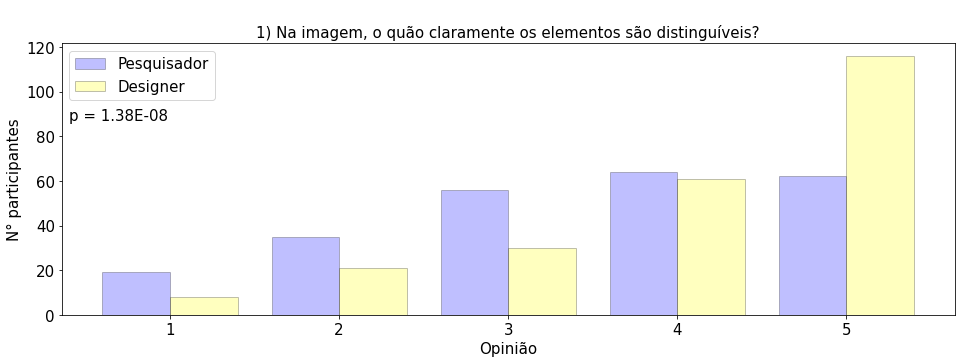

Not save


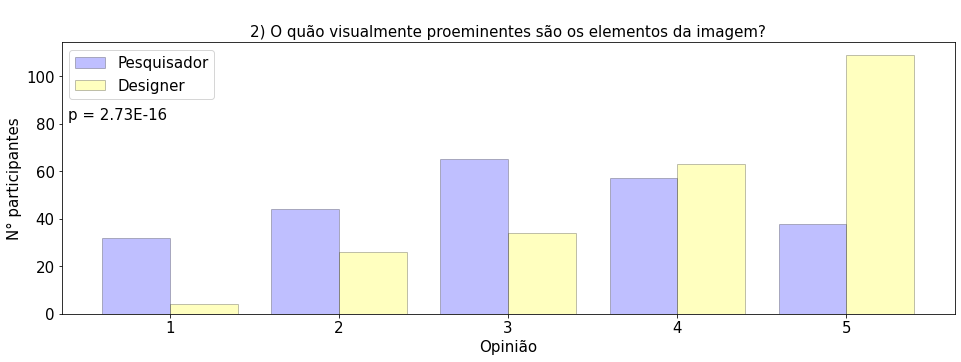

Not save


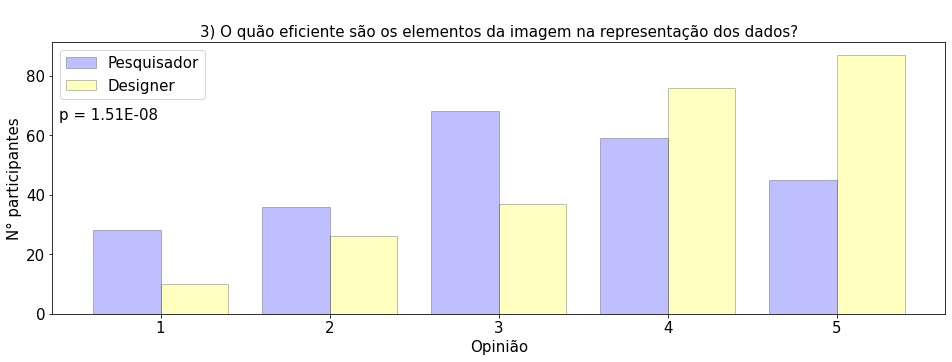

Not save


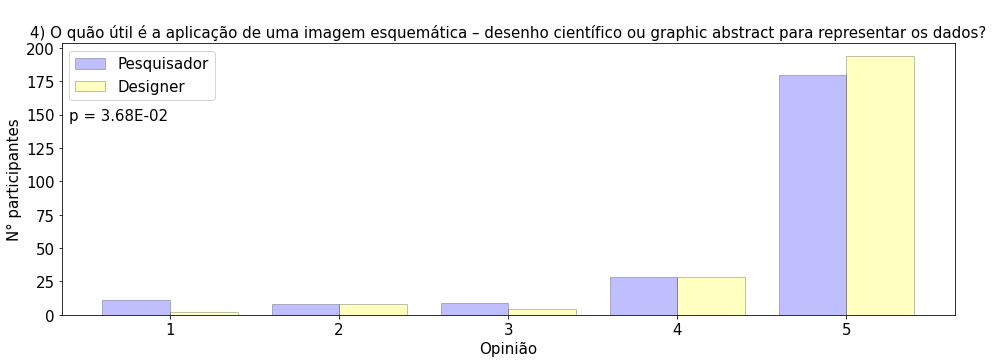

Not save


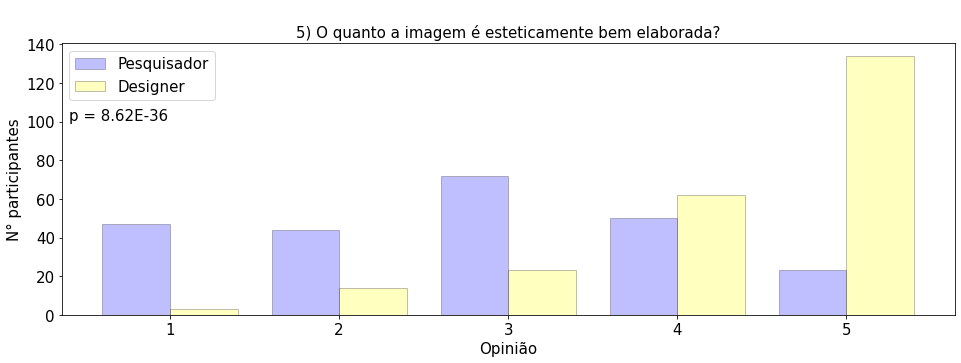

Not save


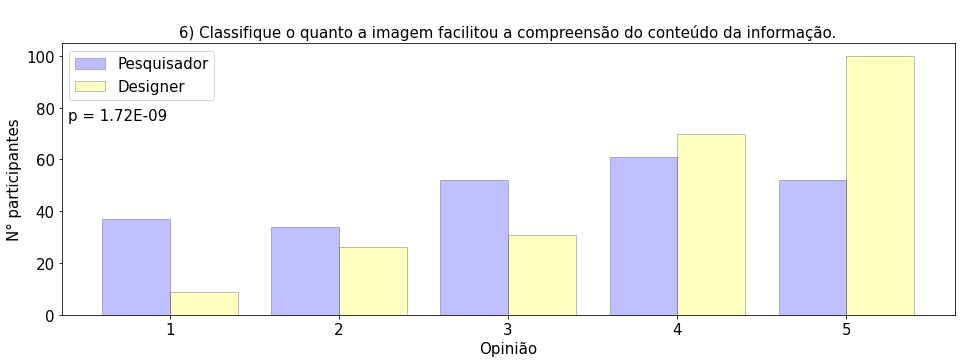

Not save


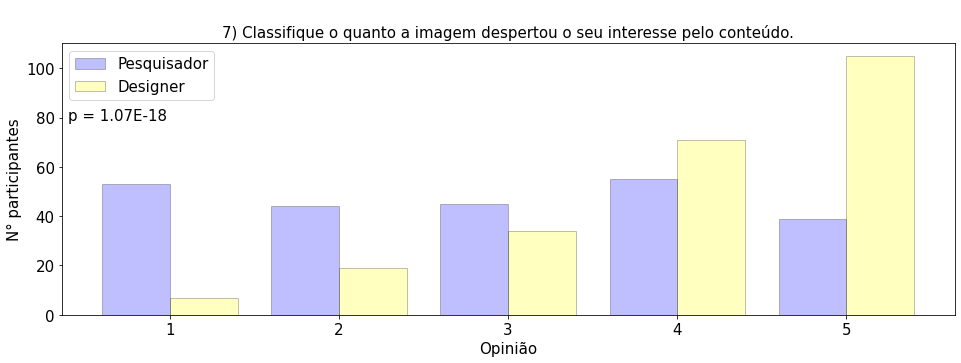

In [ ]:
col = [5,6,8,9,10,12,13]
for k, v in enumerate(col):
    barras(
        df=df,
        col=v,
        campo=save_img,
        g=k+1
    )

Not save


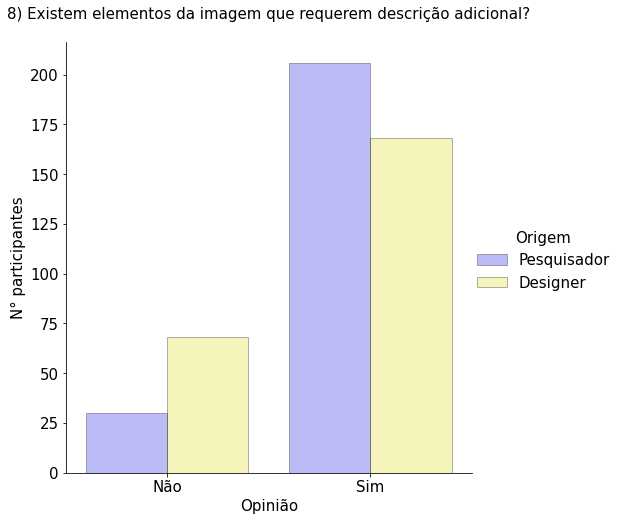

In [ ]:
barras_log_dic = {
    'df': df,
    'col': 7,
    'campo': save_img,
    'g': 8
}
barras_log(**barras_log_dic)

Not save


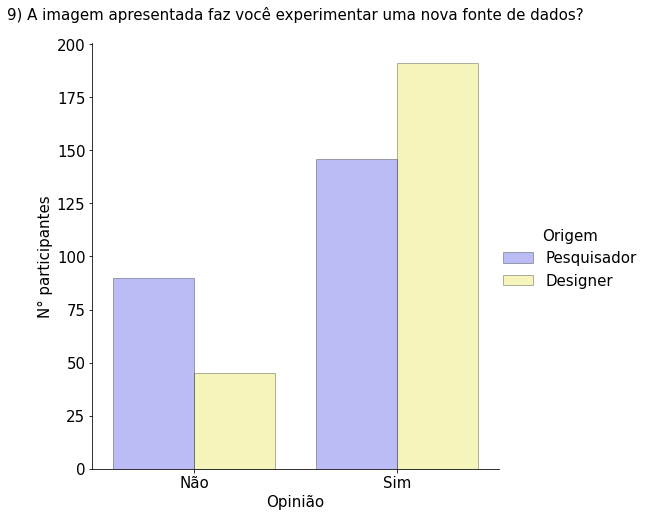

In [ ]:
barras_log_dic = {
    'df': df,
    'col': 11,
    'campo': save_img,
    'g': 9
}
barras_log(**barras_log_dic)

# Gráficos Por Figura

In [ ]:
save_img = save_img
perg_fig = -1
perg_fig += 1
perg = list(df[df.columns[4]].value_counts().index)
printLis(perg)

-------------
-=< Lista >=-
-------------
0 -> Reovírus Aviário
1 -> Células Tronco
2 -> T. gondii
3 -> Citocinas
4 -> Febre Amarela
5 -> Linfócitos


Not save


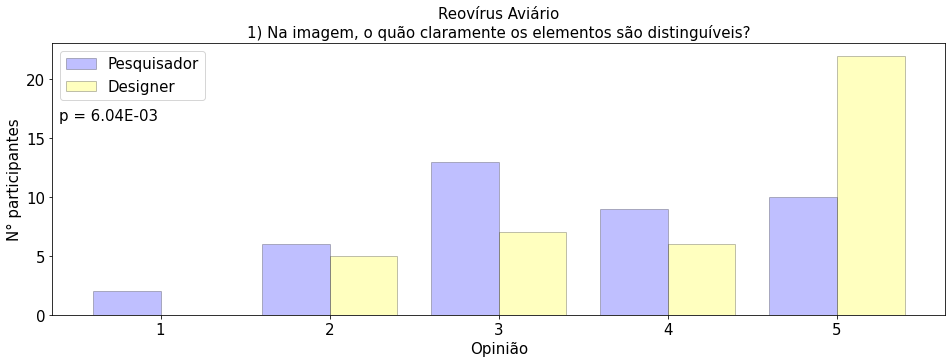

Not save


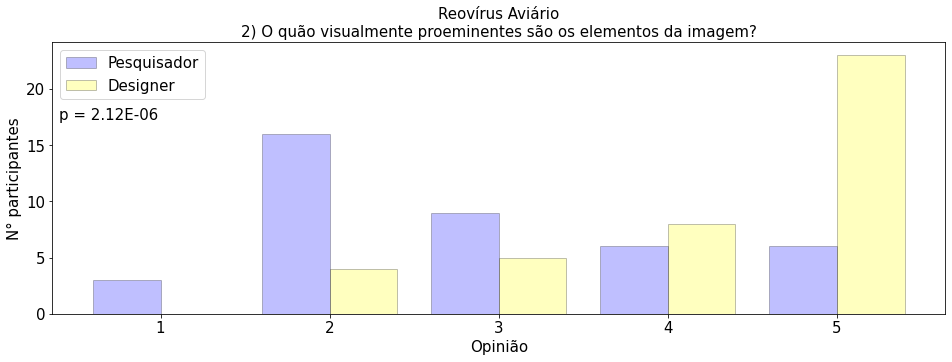

Not save


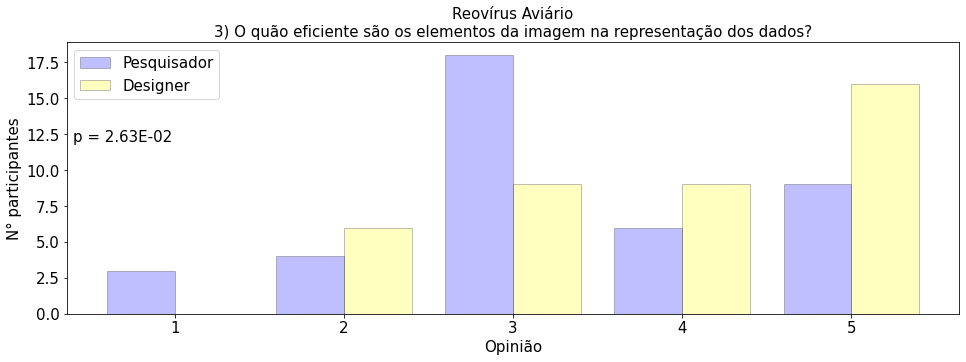

Not save


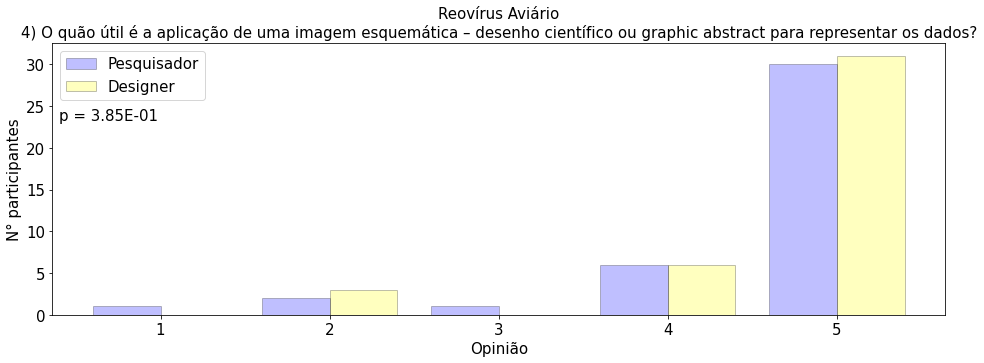

Not save


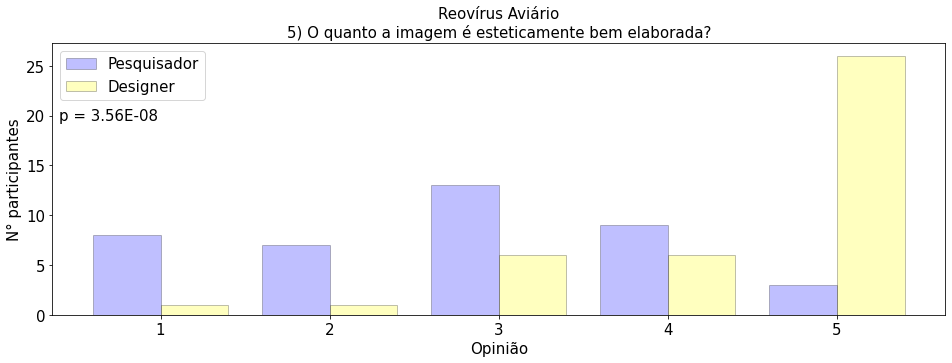

Not save


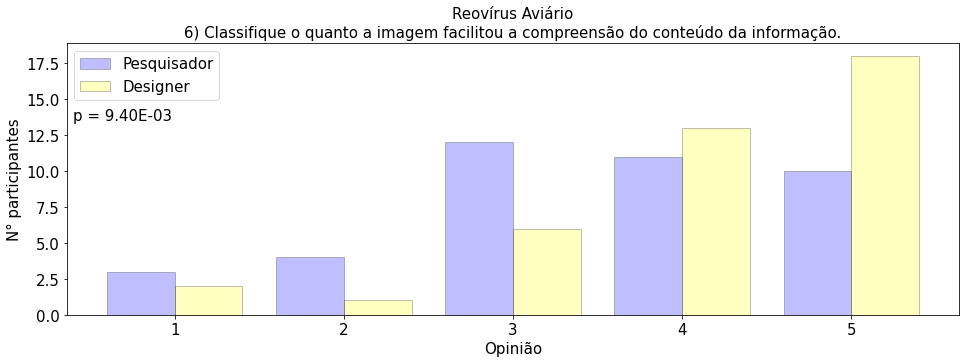

Not save


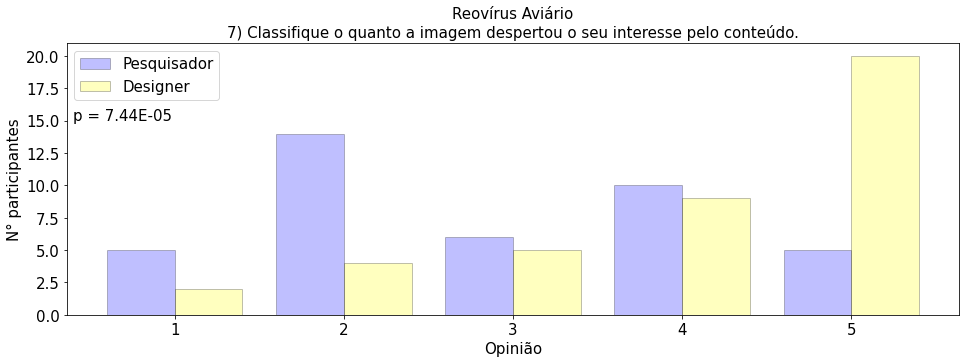

In [ ]:
col = [5,6,8,9,10,12,13]
barras_dic = {
    'df': df[(df[df.columns[4]] == perg[perg_fig])],
    'perg_fig': perg_fig,
    'campo': save_img,
}
for k, v in enumerate(col):
    barras(
        **barras_dic,
        col=v,
        g=k+1
    )

Not save


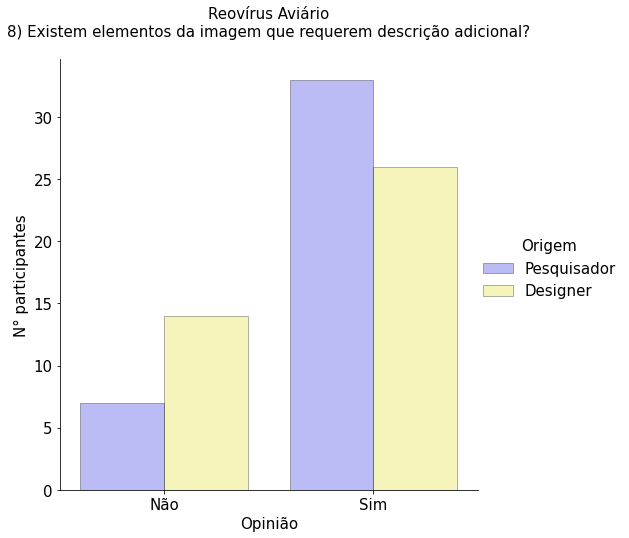

In [ ]:
barras_log_dic = {
    'df': df[df[df.columns[4]] == perg[perg_fig]],
    'col': 7,
    'campo': save_img,
    'g': str(8)+'_'+perg[perg_fig],
    'title_g': perg[perg_fig]+'\n'
}
barras_log(**barras_log_dic)

Not save


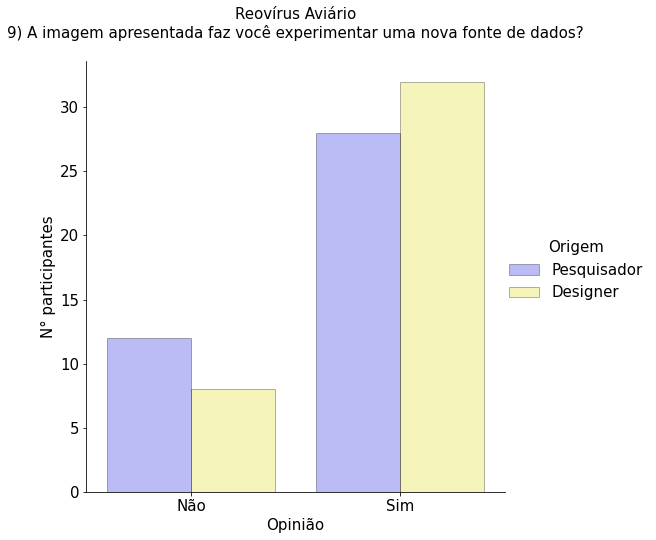

In [ ]:
barras_log_dic = {
    'df': df[df[df.columns[4]] == perg[perg_fig]],
    'col': 11,
    'campo': save_img,
    'g': str(9)+'_'+perg[perg_fig],
    'title_g': perg[perg_fig]+'\n'
}
barras_log(**barras_log_dic)

# Gráficos Grau de Formação Acadêmica

In [ ]:
perg.append('Stricto Sensu')
perg.append('Lato Sensu')
printLis(perg)

-------------
-=< Lista >=-
-------------
0 -> Reovírus Aviário
1 -> Células Tronco
2 -> T. gondii
3 -> Citocinas
4 -> Febre Amarela
5 -> Linfócitos
6 -> Stricto Sensu
7 -> Lato Sensu


In [ ]:
save_img = save_img

Not save


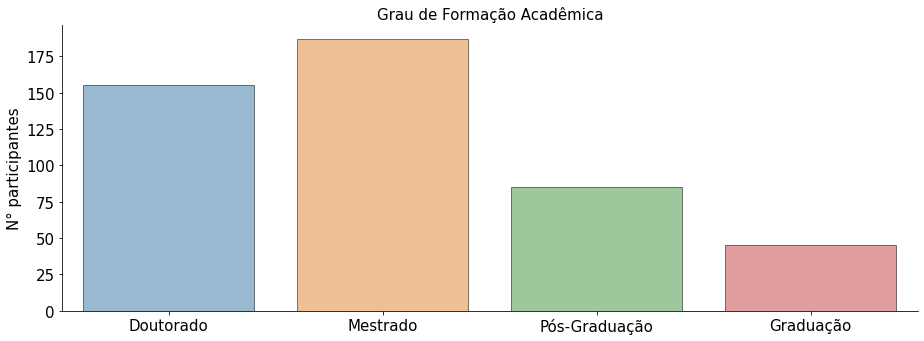

In [ ]:
col = 14
g = sns.catplot(
    kind='count',
    x=df.columns[col],
    data=df,
    alpha=0.5,
    edgecolor='black',
    order=['Doutorado','Mestrado','Pós-Graduação','Graduação']
)
g.fig.set_figwidth(16)
g.fig.set_figheight(5)
plt.xlabel('')
plt.title('Grau de Formação Acadêmica')
plt.ylabel('N° participantes')
img_save(campo=save_img, g='0_'+df.columns[col], date=timeProcess()[1])

In [ ]:
df[(df[df.columns[14]] == 'Doutorado') | (df[df.columns[14]] == 'Mestrado')]['Grau'].value_counts()

Mestrado     187
Doutorado    155
Name: Grau, dtype: int64

Not save


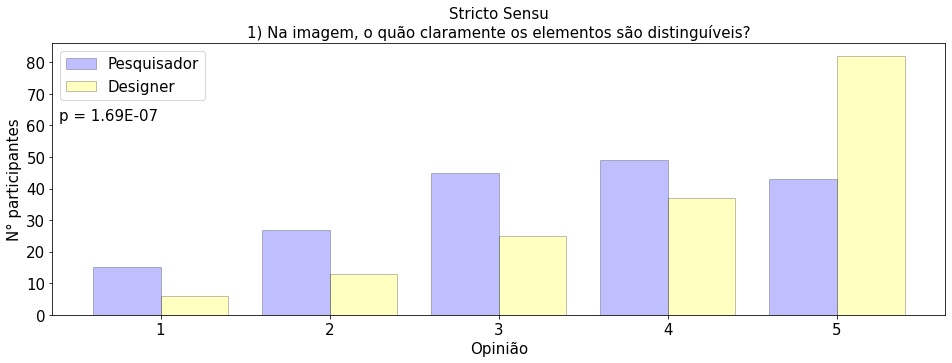

Not save


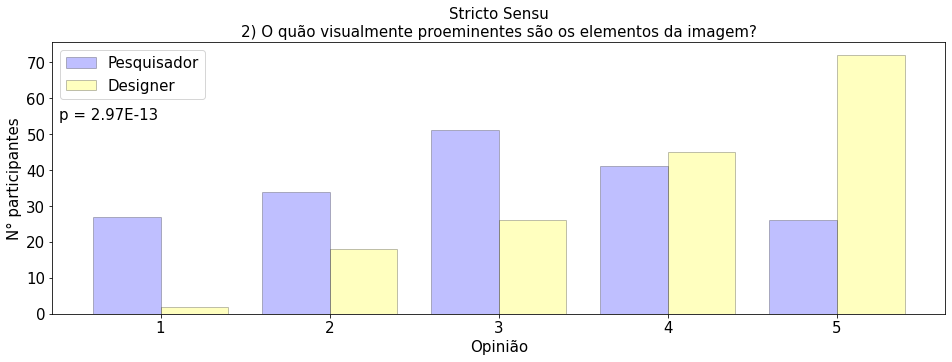

Not save


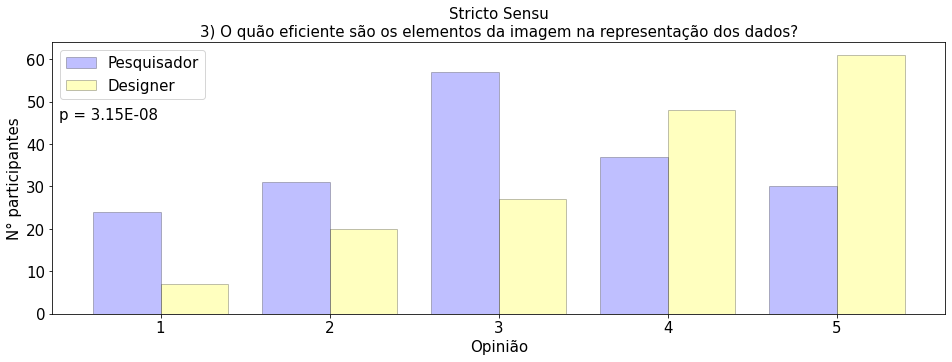

Not save


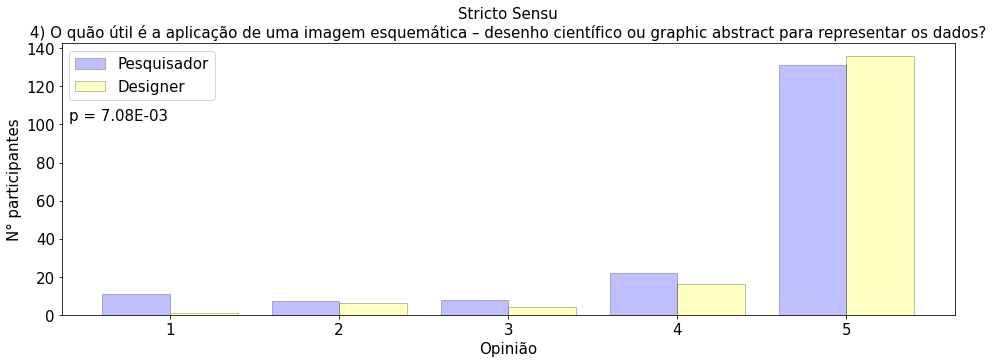

Not save


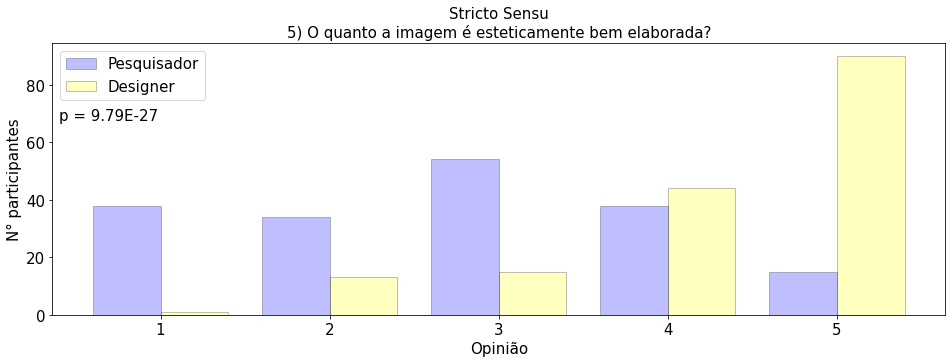

Not save


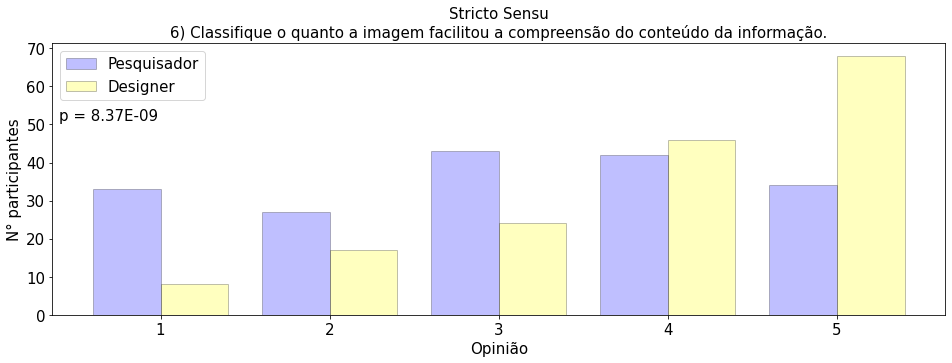

Not save


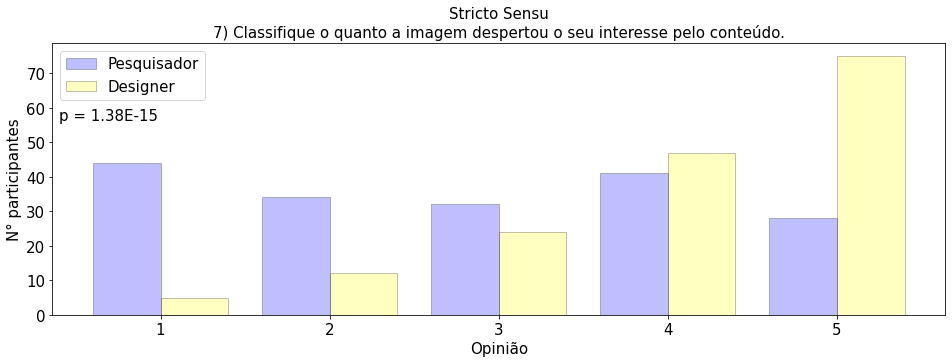

In [ ]:
col = [5,6,8,9,10,12,13]
barras_dic = {
    'df': df[(df[df.columns[14]] == 'Doutorado') | (df[df.columns[14]] == 'Mestrado')],
    'perg_fig': 6,
    'campo': save_img,
}
for k, v in enumerate(col):
    barras(
        **barras_dic,
        col=v,
        g=k+1
    )

In [ ]:
df[(df[df.columns[14]] == 'Pós-Graduação') | (df[df.columns[14]] == 'Graduação')]['Grau'].value_counts()

Pós-Graduação    85
Graduação        45
Name: Grau, dtype: int64

Not save


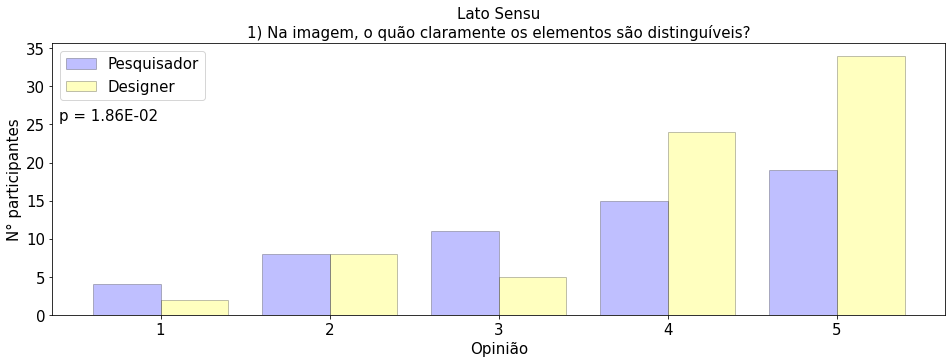

Not save


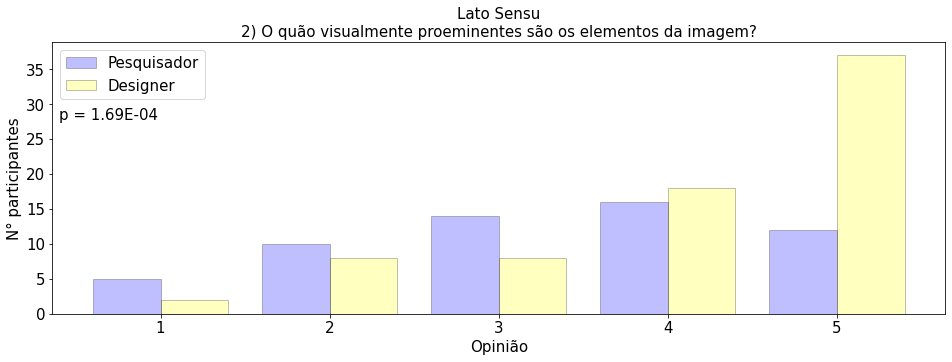

Not save


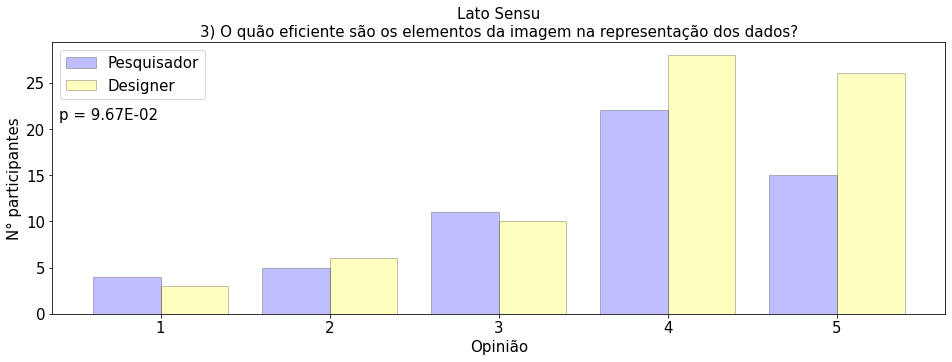

Not save


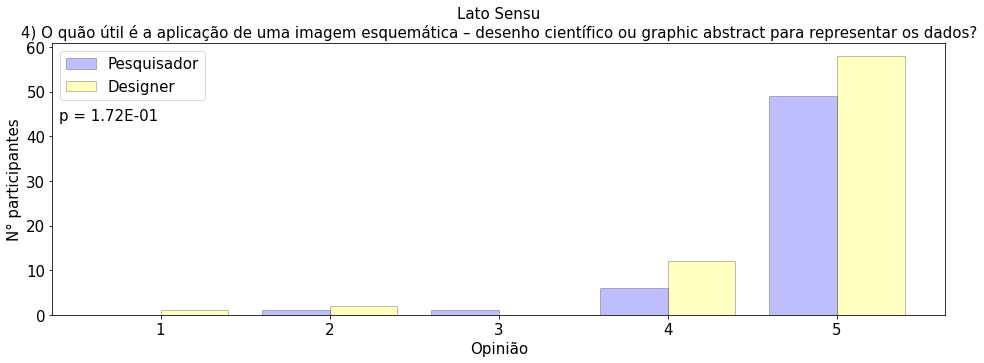

Not save


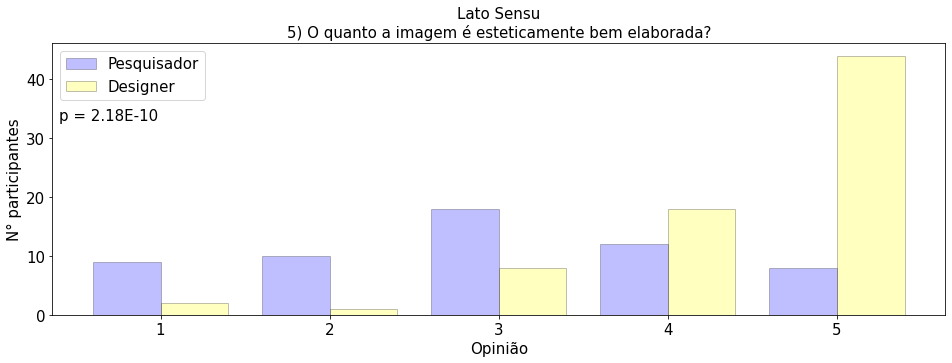

Not save


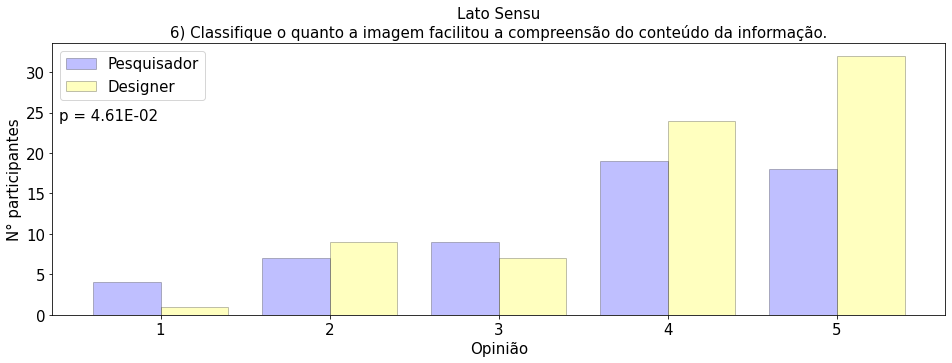

Not save


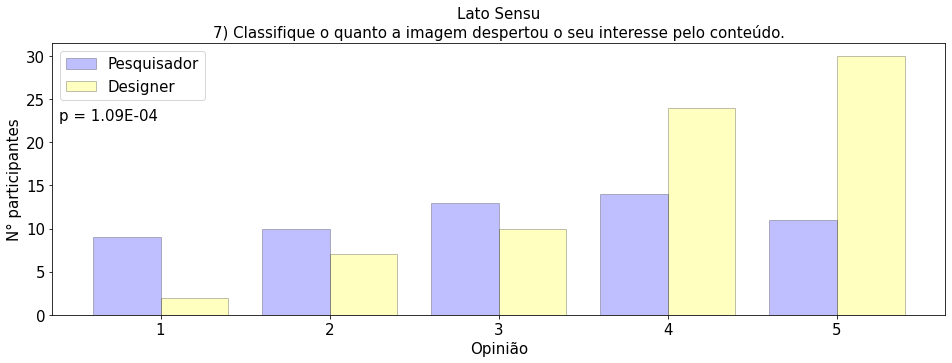

In [ ]:
col = [5,6,8,9,10,12,13]
barras_dic = {
    'df': df[(df[df.columns[14]] == 'Pós-Graduação') | (df[df.columns[14]] == 'Graduação')],
    'perg_fig': 7,
    'campo': save_img,
}
for k, v in enumerate(col):
    barras(
        **barras_dic,
        col=v,
        g=k+1
    )

# Gráficos Área Acadêmica

In [ ]:
save_img = save_img

In [ ]:
perg.append('Biológicas')
perg.append('Exatas_Humanas')
printLis(perg)

-------------
-=< Lista >=-
-------------
0 -> Reovírus Aviário
1 -> Células Tronco
2 -> T. gondii
3 -> Citocinas
4 -> Febre Amarela
5 -> Linfócitos
6 -> Stricto Sensu
7 -> Lato Sensu
8 -> Biológicas
9 -> Exatas_Humanas


Not save


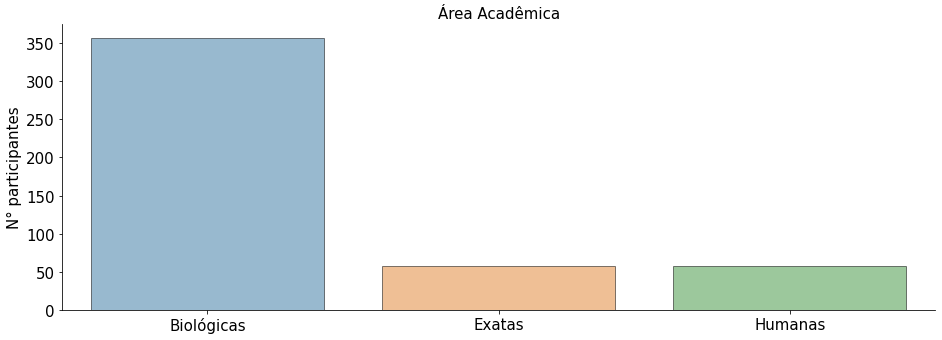

In [ ]:
col = 15
g = sns.catplot(
    kind='count',
    x=df.columns[col],
    data=df,
    alpha=0.5,
    edgecolor='black',
    order=['Biológicas','Exatas','Humanas']
)
g.fig.set_figwidth(16)
g.fig.set_figheight(5)
plt.xlabel('')
plt.title('Área Acadêmica')
plt.ylabel('N° participantes')
img_save(campo=save_img, g='0_'+df.columns[col], date=timeProcess()[1])

Not save


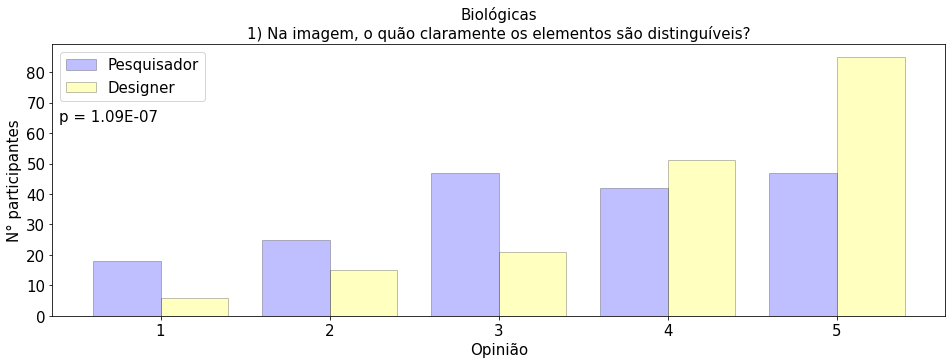

Not save


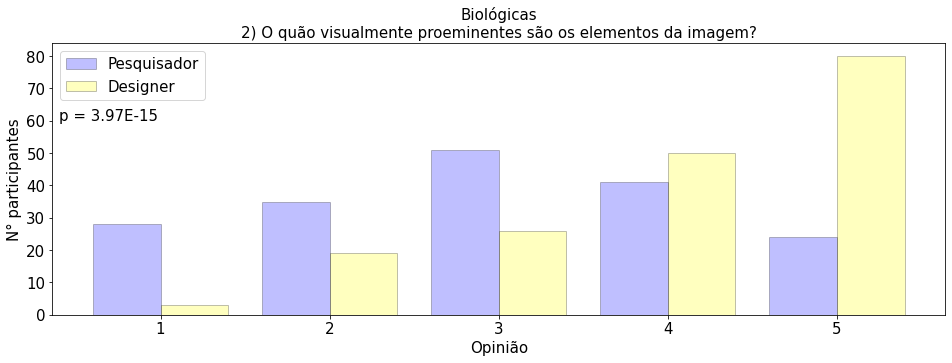

Not save


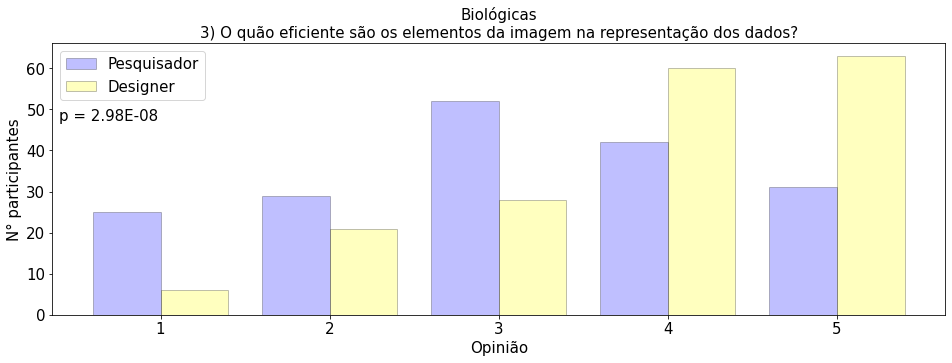

Not save


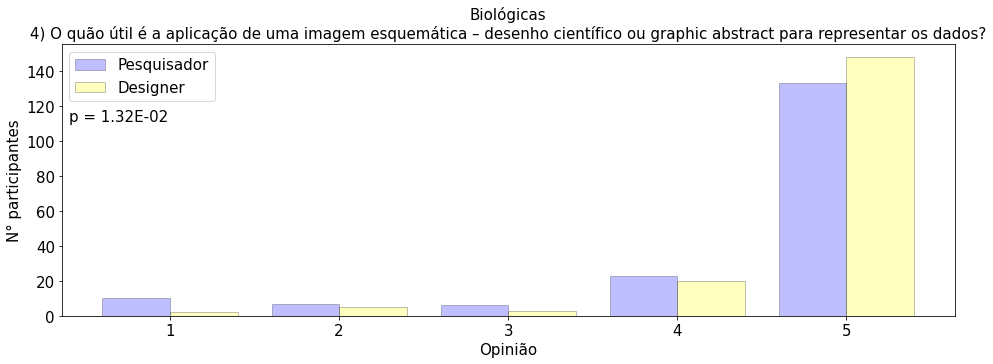

Not save


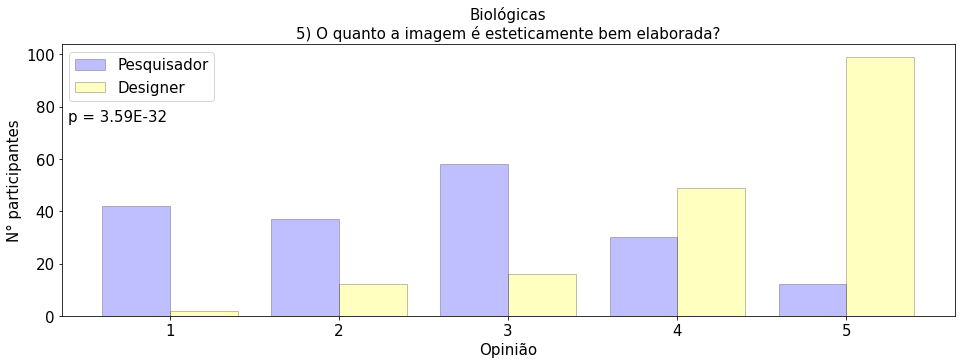

Not save


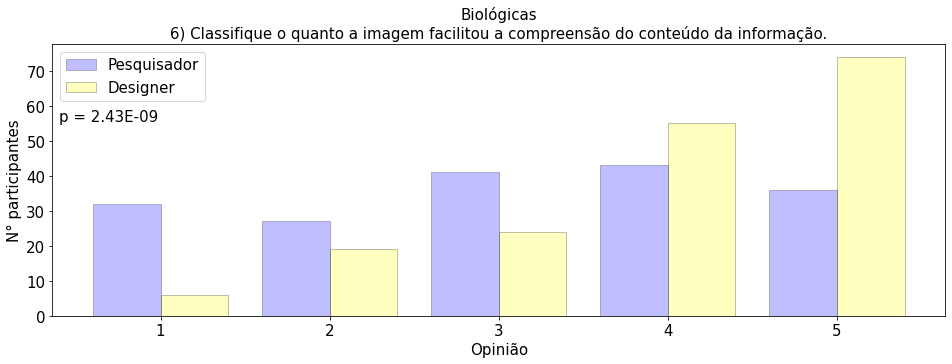

Not save


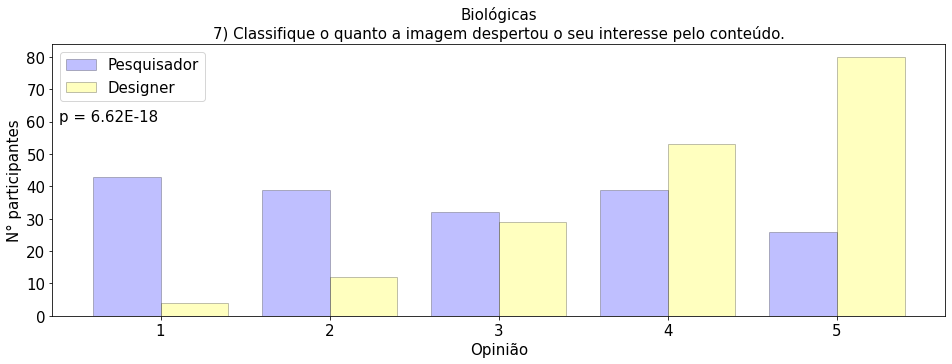

In [ ]:
col = [5,6,8,9,10,12,13]
barras_dic = {
    'df': df[(df[df.columns[15]] == 'Biológicas')],
    'perg_fig': 8,
    'campo': save_img,
}
for k, v in enumerate(col):
    barras(
        **barras_dic,
        col=v,
        g=k+1
    )

Not save


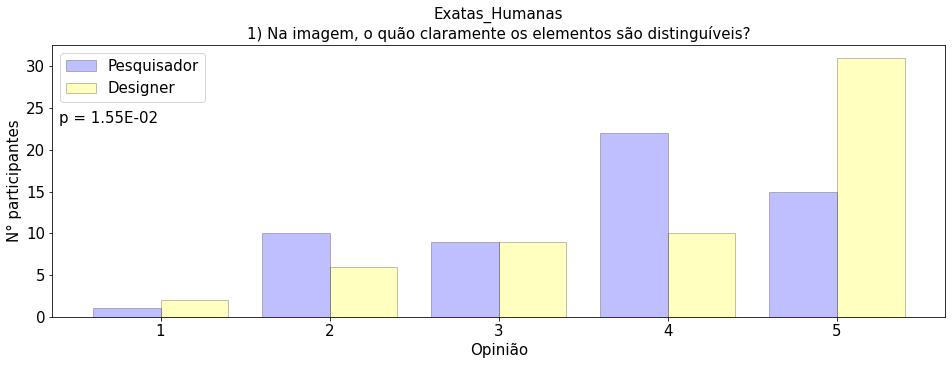

Not save


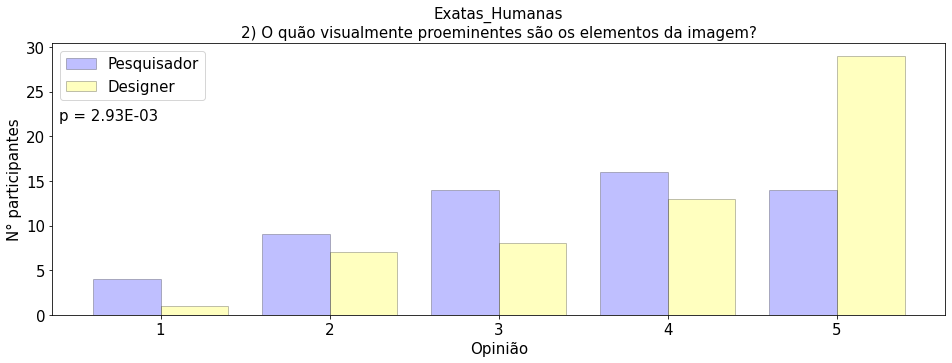

Not save


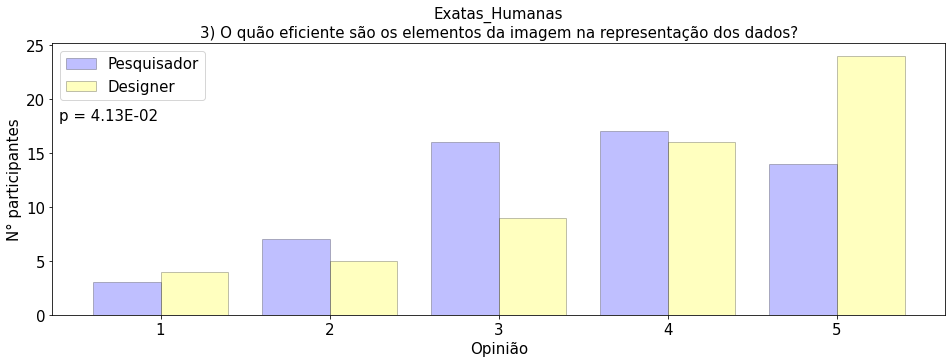

Not save


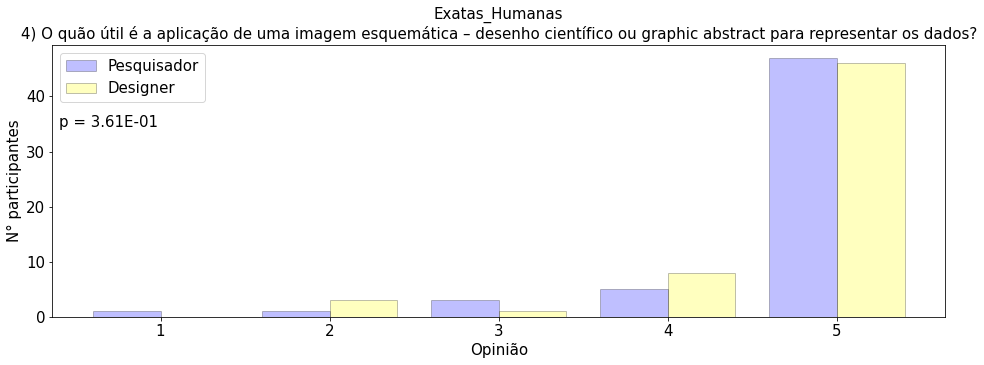

Not save


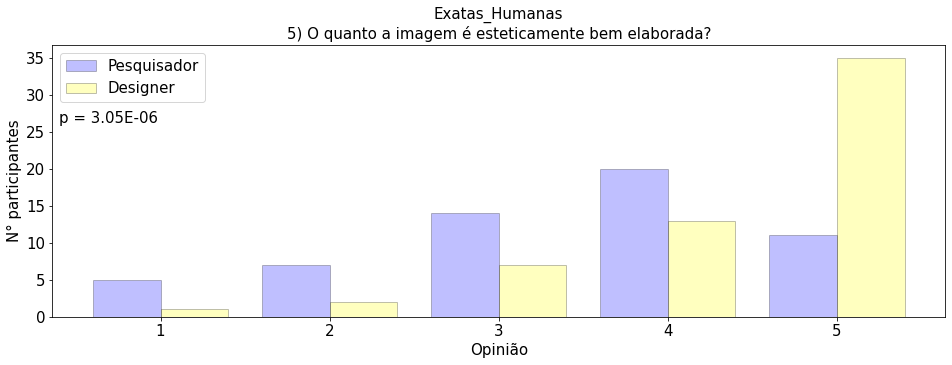

Not save


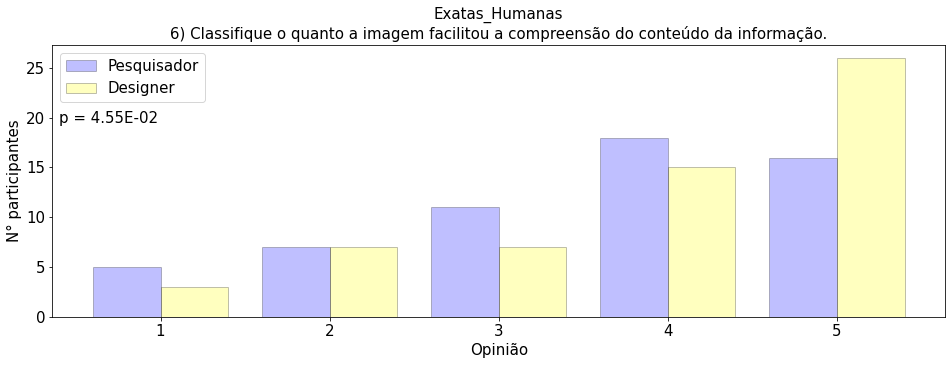

Not save


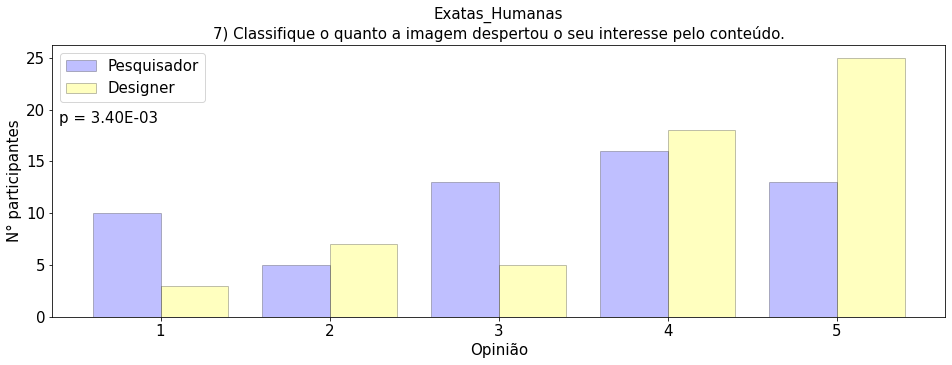

In [ ]:
col = [5,6,8,9,10,12,13]
barras_dic = {
    'df': df[(df[df.columns[15]] != 'Biológicas')],
    'perg_fig': 9,
    'campo': save_img,
}
for k, v in enumerate(col):
    barras(
        **barras_dic,
        col=v,
        g=k+1
    )